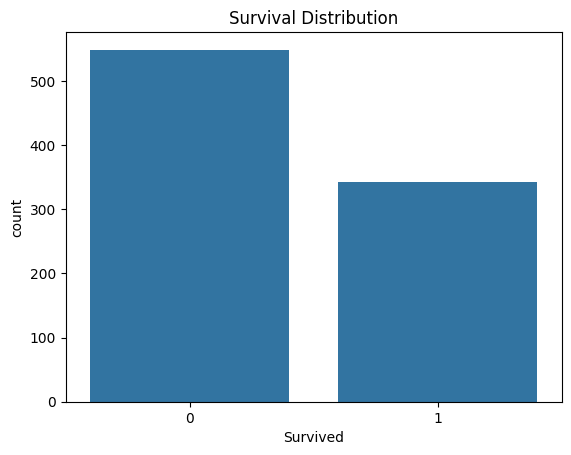

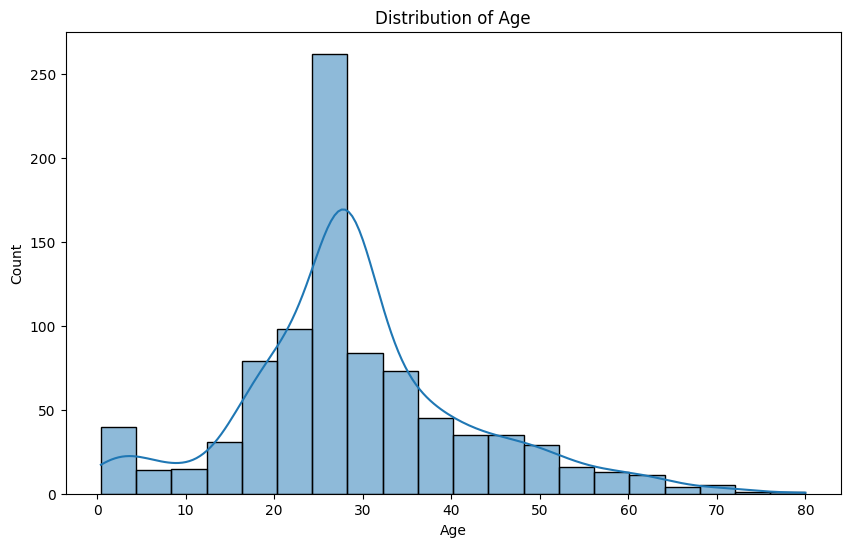

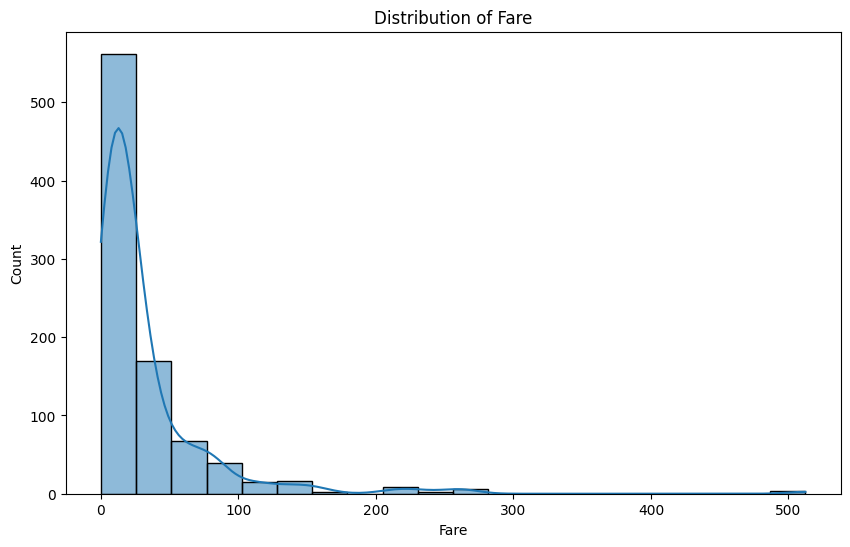

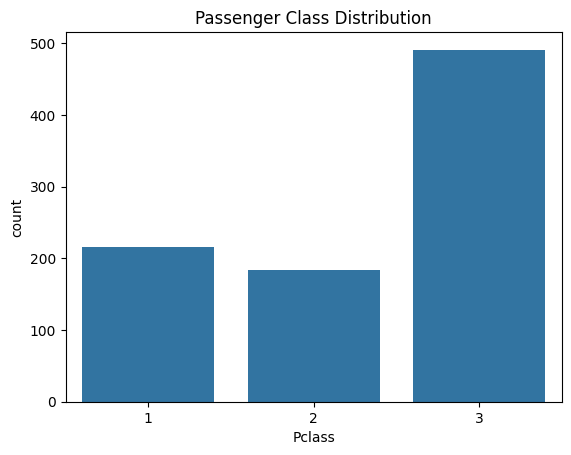

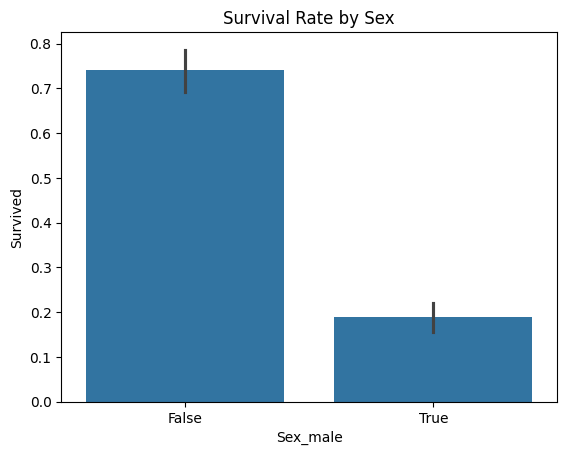

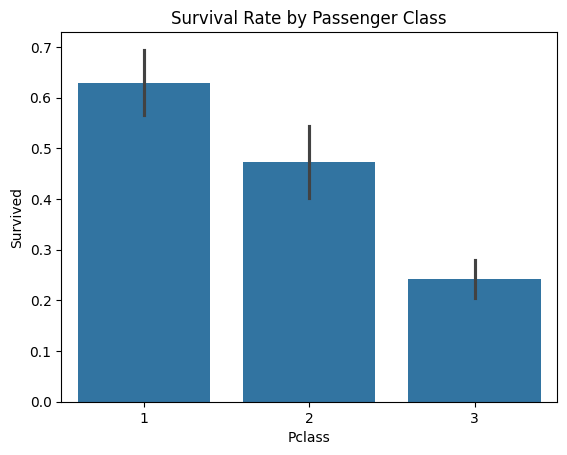

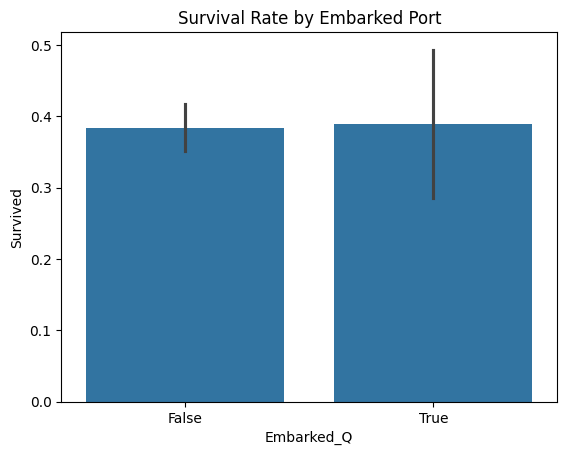

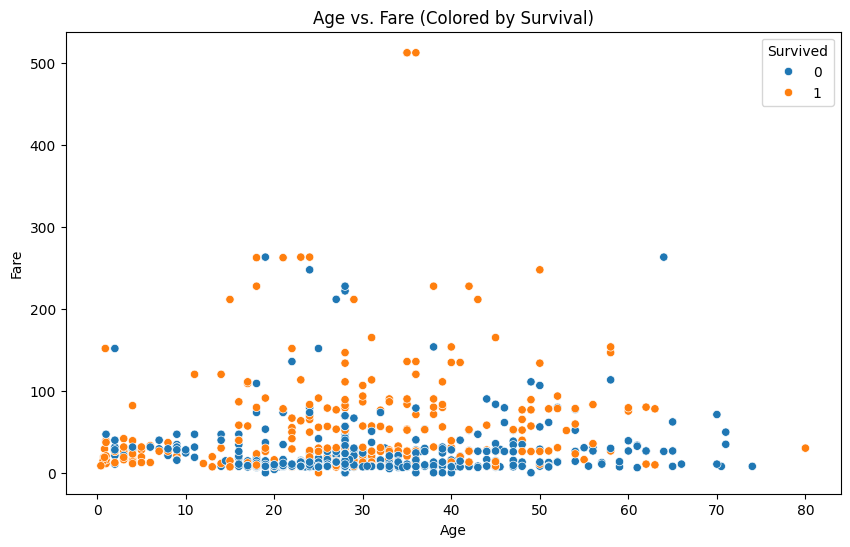

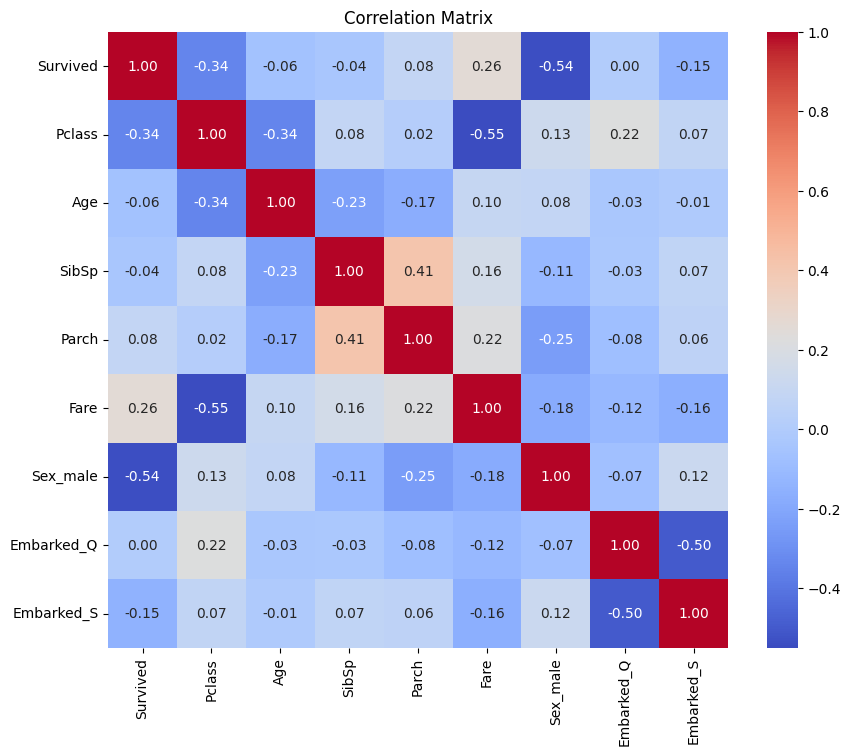

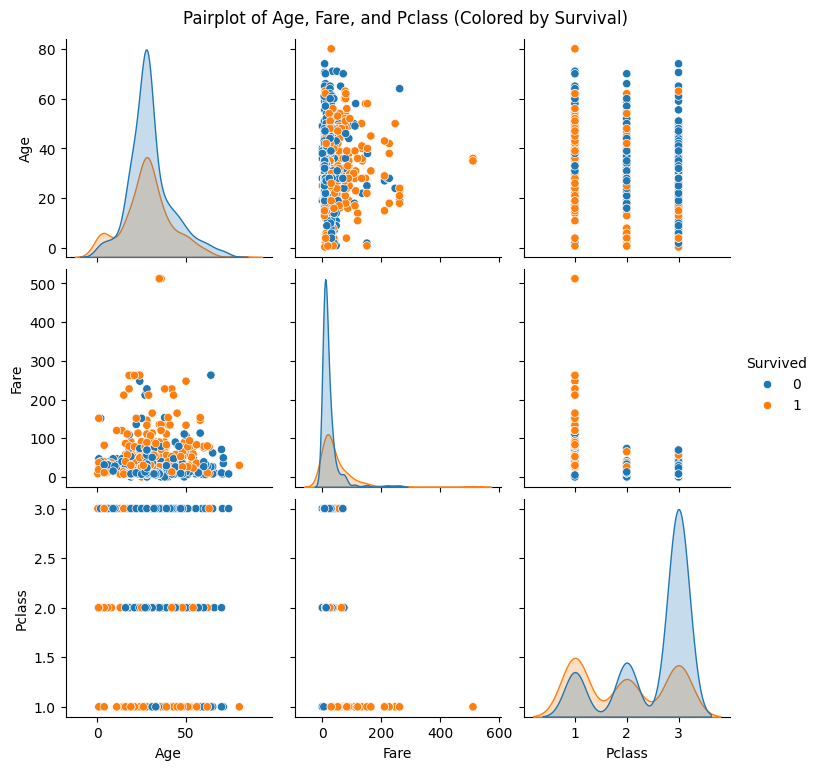

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
train_data['Sex'] = train_data['Sex'].astype('category')
train_data['Embarked'] = train_data['Embarked'].astype('category')
train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train_data['Fare'], bins=20, kde=True)
plt.title('Distribution of Fare')
plt.show()

sns.countplot(x='Pclass', data=train_data)
plt.title('Passenger Class Distribution')
plt.show()

sns.barplot(x='Sex_male', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.show()

sns.barplot(x='Embarked_Q', y='Survived', data=train_data)
plt.title('Survival Rate by Embarked Port')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=train_data, hue='Survived')
plt.title('Age vs. Fare (Colored by Survival)')
plt.show()

correlation_matrix = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
sns.pairplot(train_data, vars=['Age', 'Fare', 'Pclass'], hue='Survived')
plt.suptitle('Pairplot of Age, Fare, and Pclass (Colored by Survival)', y=1.02)
plt.show()